Loading all model results...

COMPLETE MODEL COMPARISON
                 Dataset          Model  ROC-AUC   PR-AUC  F1 Score  Precision   Recall  Threshold  Training Time (s)
   Primary (Credit Card) Neural Network 0.935626 0.806995  0.805369   0.800000 0.810811        0.9          76.313075
   Primary (Credit Card)        XGBoost 0.971232 0.852607  0.863309   0.923077 0.810811        0.5           0.999979
Secondary (Bank Account) Neural Network 0.877579 0.152575  0.171225   0.102325 0.524184        0.7         201.555726
Secondary (Bank Account)        XGBoost 0.883503 0.156696  0.228172   0.229639 0.226723        0.9           3.154690


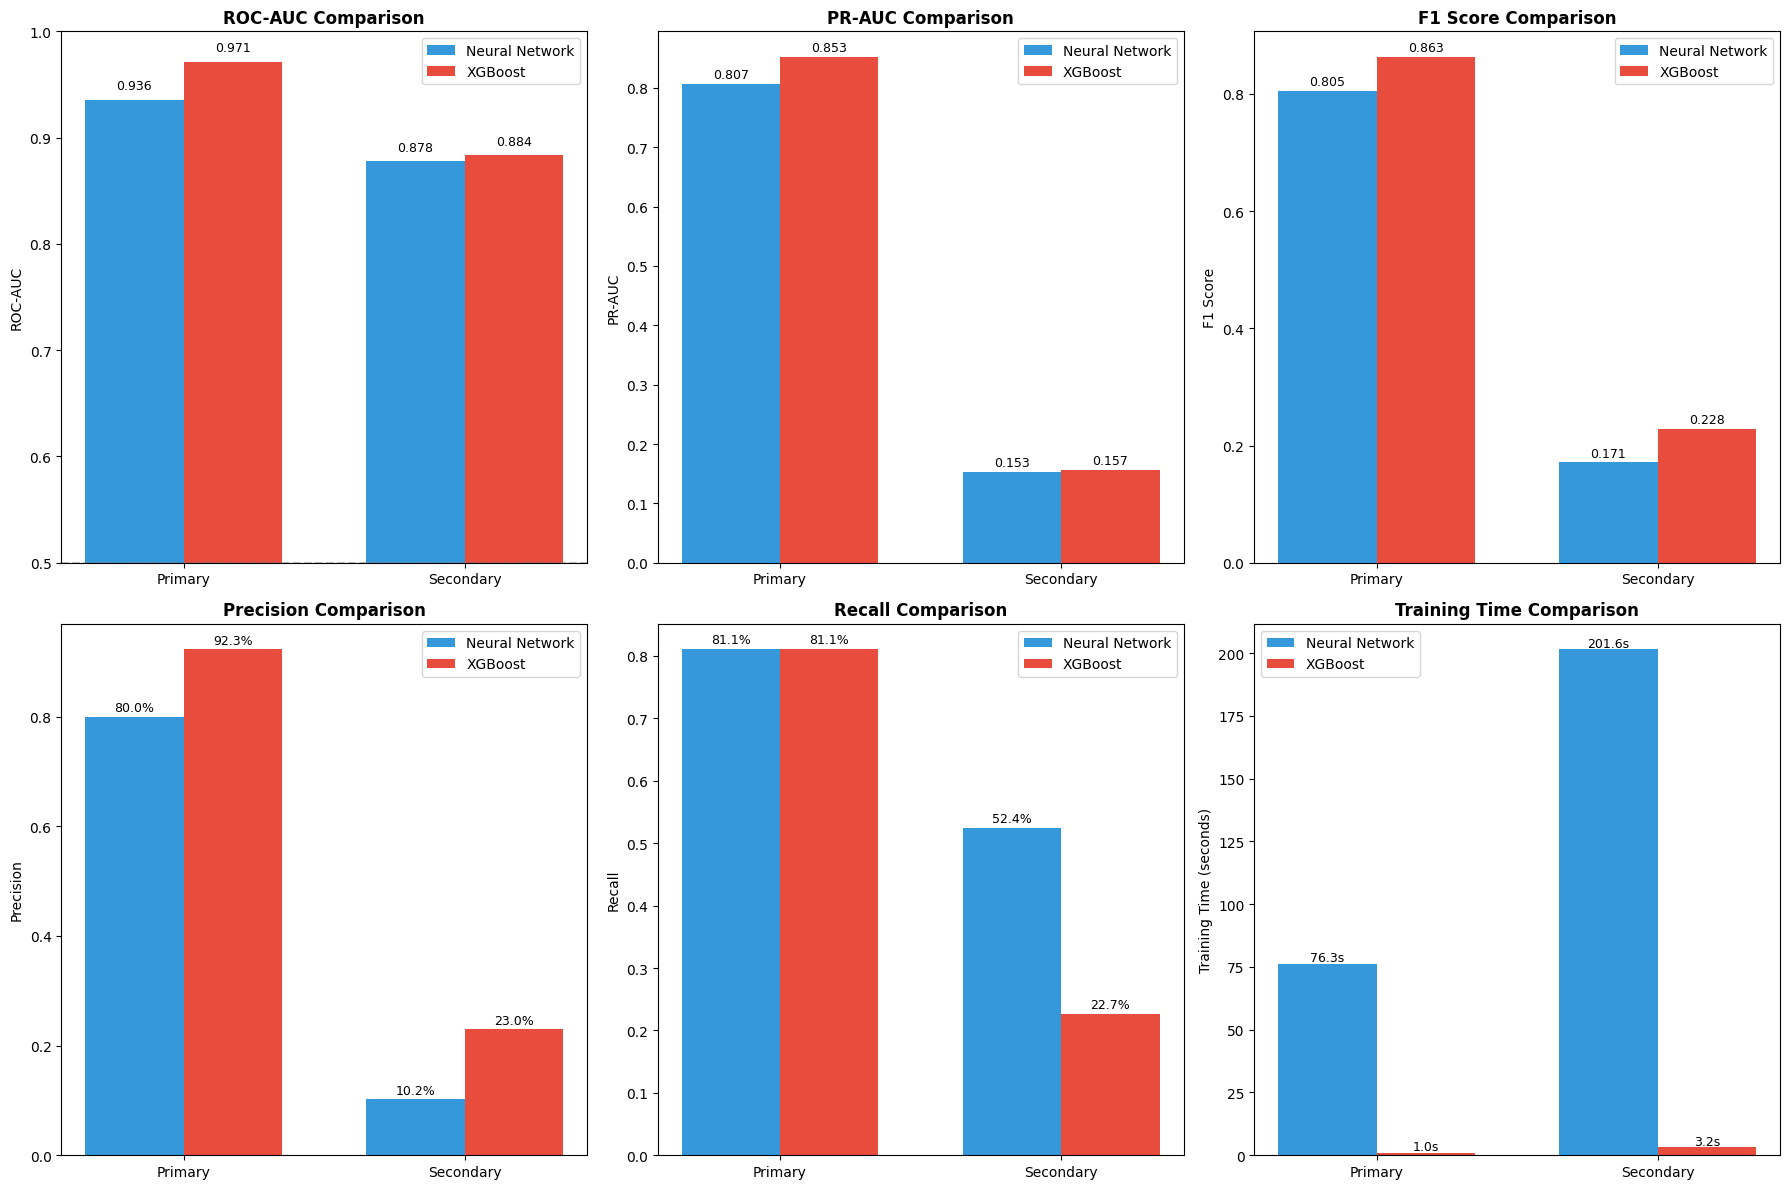


✓ Comparison visualization saved: ../outputs/comparison/final_comparison.png

FINAL SUMMARY REPORT

╔══════════════════════════════════════════════════════════════════════════════════════╗
║                           FRAUD DETECTION MODEL COMPARISON                            ║
╠══════════════════════════════════════════════════════════════════════════════════════╣
║                                                                                       ║
║  PRIMARY DATASET (Credit Card Fraud - 284,807 transactions, 0.17% fraud)             ║
║  ─────────────────────────────────────────────────────────────────────────           ║
║  • Winner: XGBoost                                                                    ║
║  • XGBoost ROC-AUC: 0.9712 vs NN: 0.9356                                             ║
║  • XGBoost F1: 0.8633 vs NN: 0.8054                                                  ║
║  • XGBoost Precision: 92.3% vs NN: 80.0%                                           ║
║  • XGB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

# ===== LOAD ALL RESULTS =====
print("Loading all model results...")

# Primary Dataset
with open('../models/primary/nn_results.pkl', 'rb') as f:
    primary_nn = pickle.load(f)
with open('../models/primary/xgb_results.pkl', 'rb') as f:
    primary_xgb = pickle.load(f)

# Secondary Dataset
with open('../models/secondary/nn_results.pkl', 'rb') as f:
    secondary_nn = pickle.load(f)
with open('../models/secondary/xgb_results.pkl', 'rb') as f:
    secondary_xgb = pickle.load(f)

# ===== CREATE COMPARISON DATAFRAME =====
results_df = pd.DataFrame([
    {
        'Dataset': 'Primary (Credit Card)',
        'Model': 'Neural Network',
        'ROC-AUC': primary_nn['roc_auc'],
        'PR-AUC': primary_nn['pr_auc'],
        'F1 Score': primary_nn['best_f1'],
        'Precision': primary_nn['precision'],
        'Recall': primary_nn['recall'],
        'Threshold': primary_nn['optimal_threshold'],
        'Training Time (s)': primary_nn['training_time']
    },
    {
        'Dataset': 'Primary (Credit Card)',
        'Model': 'XGBoost',
        'ROC-AUC': primary_xgb['roc_auc'],
        'PR-AUC': primary_xgb['pr_auc'],
        'F1 Score': primary_xgb['best_f1'],
        'Precision': primary_xgb['precision'],
        'Recall': primary_xgb['recall'],
        'Threshold': primary_xgb['optimal_threshold'],
        'Training Time (s)': primary_xgb['training_time']
    },
    {
        'Dataset': 'Secondary (Bank Account)',
        'Model': 'Neural Network',
        'ROC-AUC': secondary_nn['roc_auc'],
        'PR-AUC': secondary_nn['pr_auc'],
        'F1 Score': secondary_nn['best_f1'],
        'Precision': secondary_nn['precision'],
        'Recall': secondary_nn['recall'],
        'Threshold': secondary_nn['optimal_threshold'],
        'Training Time (s)': secondary_nn['training_time']
    },
    {
        'Dataset': 'Secondary (Bank Account)',
        'Model': 'XGBoost',
        'ROC-AUC': secondary_xgb['roc_auc'],
        'PR-AUC': secondary_xgb['pr_auc'],
        'F1 Score': secondary_xgb['best_f1'],
        'Precision': secondary_xgb['precision'],
        'Recall': secondary_xgb['recall'],
        'Threshold': secondary_xgb['optimal_threshold'],
        'Training Time (s)': secondary_xgb['training_time']
    }
])

# ===== DISPLAY RESULTS TABLE =====
print("\n" + "="*90)
print("COMPLETE MODEL COMPARISON")
print("="*90)
print(results_df.to_string(index=False))

# ===== VISUALIZATIONS =====
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Color scheme
colors = {'Neural Network': '#3498db', 'XGBoost': '#e74c3c'}
datasets = ['Primary (Credit Card)', 'Secondary (Bank Account)']

# Plot 1: ROC-AUC Comparison
x = np.arange(len(datasets))
width = 0.35

nn_roc = [primary_nn['roc_auc'], secondary_nn['roc_auc']]
xgb_roc = [primary_xgb['roc_auc'], secondary_xgb['roc_auc']]

axes[0, 0].bar(x - width/2, nn_roc, width, label='Neural Network', color=colors['Neural Network'])
axes[0, 0].bar(x + width/2, xgb_roc, width, label='XGBoost', color=colors['XGBoost'])
axes[0, 0].set_ylabel('ROC-AUC')
axes[0, 0].set_title('ROC-AUC Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(['Primary', 'Secondary'])
axes[0, 0].legend()
axes[0, 0].set_ylim(0.5, 1.0)
axes[0, 0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Random')
for i, (nn, xg) in enumerate(zip(nn_roc, xgb_roc)):
    axes[0, 0].text(i - width/2, nn + 0.01, f'{nn:.3f}', ha='center', fontsize=9)
    axes[0, 0].text(i + width/2, xg + 0.01, f'{xg:.3f}', ha='center', fontsize=9)

# Plot 2: PR-AUC Comparison
nn_pr = [primary_nn['pr_auc'], secondary_nn['pr_auc']]
xgb_pr = [primary_xgb['pr_auc'], secondary_xgb['pr_auc']]

axes[0, 1].bar(x - width/2, nn_pr, width, label='Neural Network', color=colors['Neural Network'])
axes[0, 1].bar(x + width/2, xgb_pr, width, label='XGBoost', color=colors['XGBoost'])
axes[0, 1].set_ylabel('PR-AUC')
axes[0, 1].set_title('PR-AUC Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(['Primary', 'Secondary'])
axes[0, 1].legend()
for i, (nn, xg) in enumerate(zip(nn_pr, xgb_pr)):
    axes[0, 1].text(i - width/2, nn + 0.01, f'{nn:.3f}', ha='center', fontsize=9)
    axes[0, 1].text(i + width/2, xg + 0.01, f'{xg:.3f}', ha='center', fontsize=9)

# Plot 3: F1 Score Comparison
nn_f1 = [primary_nn['best_f1'], secondary_nn['best_f1']]
xgb_f1 = [primary_xgb['best_f1'], secondary_xgb['best_f1']]

axes[0, 2].bar(x - width/2, nn_f1, width, label='Neural Network', color=colors['Neural Network'])
axes[0, 2].bar(x + width/2, xgb_f1, width, label='XGBoost', color=colors['XGBoost'])
axes[0, 2].set_ylabel('F1 Score')
axes[0, 2].set_title('F1 Score Comparison', fontsize=12, fontweight='bold')
axes[0, 2].set_xticks(x)
axes[0, 2].set_xticklabels(['Primary', 'Secondary'])
axes[0, 2].legend()
for i, (nn, xg) in enumerate(zip(nn_f1, xgb_f1)):
    axes[0, 2].text(i - width/2, nn + 0.01, f'{nn:.3f}', ha='center', fontsize=9)
    axes[0, 2].text(i + width/2, xg + 0.01, f'{xg:.3f}', ha='center', fontsize=9)

# Plot 4: Precision Comparison
nn_prec = [primary_nn['precision'], secondary_nn['precision']]
xgb_prec = [primary_xgb['precision'], secondary_xgb['precision']]

axes[1, 0].bar(x - width/2, nn_prec, width, label='Neural Network', color=colors['Neural Network'])
axes[1, 0].bar(x + width/2, xgb_prec, width, label='XGBoost', color=colors['XGBoost'])
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_title('Precision Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(['Primary', 'Secondary'])
axes[1, 0].legend()
for i, (nn, xg) in enumerate(zip(nn_prec, xgb_prec)):
    axes[1, 0].text(i - width/2, nn + 0.01, f'{nn:.1%}', ha='center', fontsize=9)
    axes[1, 0].text(i + width/2, xg + 0.01, f'{xg:.1%}', ha='center', fontsize=9)

# Plot 5: Recall Comparison
nn_rec = [primary_nn['recall'], secondary_nn['recall']]
xgb_rec = [primary_xgb['recall'], secondary_xgb['recall']]

axes[1, 1].bar(x - width/2, nn_rec, width, label='Neural Network', color=colors['Neural Network'])
axes[1, 1].bar(x + width/2, xgb_rec, width, label='XGBoost', color=colors['XGBoost'])
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_title('Recall Comparison', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(['Primary', 'Secondary'])
axes[1, 1].legend()
for i, (nn, xg) in enumerate(zip(nn_rec, xgb_rec)):
    axes[1, 1].text(i - width/2, nn + 0.01, f'{nn:.1%}', ha='center', fontsize=9)
    axes[1, 1].text(i + width/2, xg + 0.01, f'{xg:.1%}', ha='center', fontsize=9)

# Plot 6: Training Time Comparison
nn_time = [primary_nn['training_time'], secondary_nn['training_time']]
xgb_time = [primary_xgb['training_time'], secondary_xgb['training_time']]

axes[1, 2].bar(x - width/2, nn_time, width, label='Neural Network', color=colors['Neural Network'])
axes[1, 2].bar(x + width/2, xgb_time, width, label='XGBoost', color=colors['XGBoost'])
axes[1, 2].set_ylabel('Training Time (seconds)')
axes[1, 2].set_title('Training Time Comparison', fontsize=12, fontweight='bold')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(['Primary', 'Secondary'])
axes[1, 2].legend()
for i, (nn, xg) in enumerate(zip(nn_time, xgb_time)):
    axes[1, 2].text(i - width/2, nn + 1, f'{nn:.1f}s', ha='center', fontsize=9)
    axes[1, 2].text(i + width/2, xg + 1, f'{xg:.1f}s', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig('../outputs/comparison/final_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Comparison visualization saved: ../outputs/comparison/final_comparison.png")

# ===== SUMMARY REPORT =====
print("\n" + "="*90)
print("FINAL SUMMARY REPORT")
print("="*90)
print("""
╔══════════════════════════════════════════════════════════════════════════════════════╗
║                           FRAUD DETECTION MODEL COMPARISON                            ║
╠══════════════════════════════════════════════════════════════════════════════════════╣
║                                                                                       ║
║  PRIMARY DATASET (Credit Card Fraud - 284,807 transactions, 0.17% fraud)             ║
║  ─────────────────────────────────────────────────────────────────────────           ║
║  • Winner: XGBoost                                                                    ║
║  • XGBoost ROC-AUC: {:.4f} vs NN: {:.4f}                                             ║
║  • XGBoost F1: {:.4f} vs NN: {:.4f}                                                  ║
║  • XGBoost Precision: {:.1%} vs NN: {:.1%}                                           ║
║  • XGBoost 76x faster training                                                        ║
║                                                                                       ║
║  SECONDARY DATASET (Bank Account Fraud - 1,000,000 transactions, 1.10% fraud)        ║
║  ─────────────────────────────────────────────────────────────────────────           ║
║  • Winner: XGBoost (marginal)                                                         ║
║  • XGBoost ROC-AUC: {:.4f} vs NN: {:.4f}                                             ║
║  • XGBoost F1: {:.4f} vs NN: {:.4f}                                                  ║
║  • Trade-off: NN has higher recall, XGBoost has higher precision                      ║
║  • XGBoost 63x faster training                                                        ║
║                                                                                       ║
║  KEY FINDINGS:                                                                        ║
║  1. XGBoost outperforms Neural Networks on both datasets                              ║
║  2. XGBoost is significantly faster (1-3 seconds vs 76-201 seconds)                   ║
║  3. Primary dataset has stronger fraud signals (higher performance)                   ║
║  4. Secondary dataset is more challenging (weaker feature correlations)               ║
║  5. Threshold optimization is crucial for precision-recall balance                    ║
║                                                                                       ║
╚══════════════════════════════════════════════════════════════════════════════════════╝
""".format(
    primary_xgb['roc_auc'], primary_nn['roc_auc'],
    primary_xgb['best_f1'], primary_nn['best_f1'],
    primary_xgb['precision'], primary_nn['precision'],
    secondary_xgb['roc_auc'], secondary_nn['roc_auc'],
    secondary_xgb['best_f1'], secondary_nn['best_f1']
))

# Save comparison results
results_df.to_csv('../outputs/comparison/model_comparison.csv', index=False)
print("✓ Comparison results saved: ../outputs/comparison/model_comparison.csv")